## 멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기

### <Step1. 탐색> : 데이터의 기초 정보 살펴보기

#### [Chipotle 데이터셋의 기본 정보]

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [2]:
print(chipo.shape)
print("------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
type(chipo)

pandas.core.frame.DataFrame

-----

### [Chipotle 데이터셋의 행과 열, 데이터]

In [4]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


-----

##### 이제 데이터의 수치적 특징 탐색을 위한 간단한 질문들을 정의합니다.

- quantity와 item_price의 요약 통계
- order_id와 item_name의 개수

### [Chipotle 데이터셋의 수치적 특징 파악]

##### describe 함수로 요약 통계량 출력하기

In [5]:
chipo['order_id'] = chipo['order_id'].astype(str) # order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.

In [13]:
print(chipo.describe()) # chipo dataframe에서 수치형 피처들의 요약 통계량을 확인합니다.

quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


-----

##### unique 함수로 범주형 피처의 개수 출력하기

In [7]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


In [6]:
chipo['order_id']

0          1
1          1
2          1
3          1
4          2
        ... 
4617    1833
4618    1833
4619    1834
4620    1834
4621    1834
Name: order_id, Length: 4622, dtype: object

In [11]:
chipo['item_name']

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

-----

### <Step2. 인사이트의 발견> : 탐색과 시각화

-----
##### 다음으로, 인사이트를 발견할 수 있을만한 개념적 질문들을 정의합니다.

- 가장 많이 주문한 item은 무엇인지
- item당 주문의 총량은 얼마인지

### [가장 많이 주문한 item]

In [20]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [21]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [12]:
# 리스트화
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

In [13]:
# 리스트화
chipo['item_name'].value_counts().index.tolist()

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Steak Bowl',
 'Chips',
 'Bottled Water',
 'Chicken Soft Tacos',
 'Chips and Fresh Tomato Salsa',
 'Chicken Salad Bowl',
 'Canned Soda',
 'Side of Chips',
 'Veggie Burrito',
 'Barbacoa Burrito',
 'Veggie Bowl',
 'Carnitas Bowl',
 'Barbacoa Bowl',
 'Carnitas Burrito',
 'Steak Soft Tacos',
 '6 Pack Soft Drink',
 'Chips and Tomatillo Red Chili Salsa',
 'Chicken Crispy Tacos',
 'Chips and Tomatillo Green Chili Salsa',
 'Carnitas Soft Tacos',
 'Steak Crispy Tacos',
 'Chips and Tomatillo-Green Chili Salsa',
 'Steak Salad Bowl',
 'Nantucket Nectar',
 'Barbacoa Soft Tacos',
 'Chips and Roasted Chili Corn Salsa',
 'Izze',
 'Chips and Tomatillo-Red Chili Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Veggie Salad Bowl',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Chicken Salad',
 'Veggie Soft Tacos',
 'Carnitas Crispy Tacos',
 'Carnitas Salad Bowl',
 'Burrito',
 'Veggie Salad',
 'Steak

In [27]:
# index 안에 리스트가 들어있음
chipo['item_name'].value_counts().index[0]

'Chicken Bowl'

In [30]:
# index 안에 리스트가 들어있음
chipo['item_name'].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Izze', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa', 'Barbacoa Crispy Tacos',
       'Barbacoa Salad Bowl', 'Chicken Salad', 'Veggie Soft Tacos',
       'Carnitas Crispy Tac

-----

### [item당 주문 개수와 총량 구하기]

In [14]:
# item당 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [33]:
# item당 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량을 출력합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

-----

### [시각화로 분석 결과 살펴보기]
- 지금까지의 분석 결과를 간단한 시각화로 표현

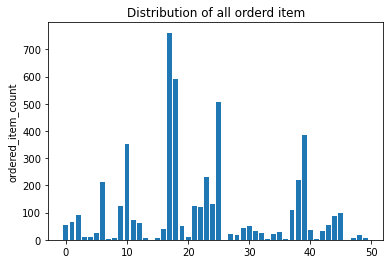

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

-----

- pandas에서 유용하게 사용되는 함수 value_counts()와 unique()의 차이점

In [35]:
print(chipo['item_name'].value_counts()[:10])

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


In [36]:
print(type(chipo['item_name'].value_counts()))

<class 'pandas.core.series.Series'>


In [37]:
print(chipo['item_name'].unique()[:10])

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


In [38]:
print(type(chipo['item_name'].unique()))

<class 'numpy.ndarray'>


-----

### <Step3. 데이터 전처리> : 나만의 조력자를 정의하자

### [apply와 lambda 함수를 이용한 데이터 전처리]

In [39]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [44]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
# 이미 위에서 float으로 전환했기때문에 또 float으로 바꿀수 없어서 에러 뜨기 때문에 다시 파일을 불러와야함
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [45]:
# column 단위 데이터에 apply 함수로 전처리를 적용합니다.
%precision 3 # 이미 위에서 float으로 전환했기때문에 또 float으로 바꿀수 없어서 에러 뜨기 때문에 다시 파일을 불러와야함
pd.set_option('precision',3)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,order_id,quantity,item_price
count,4622.000,4622.000,4622.000
mean,927.255,1.076,7.464
std,528.891,0.410,4.246
min,1.000,1.000,1.090
25%,477.250,1.000,3.390
50%,926.000,1.000,8.750
75%,1393.000,1.000,9.250
max,1834.000,15.000,44.250


In [19]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

-----

#### <Step4. 탐색적 분석>

##### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기


- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기
-----

### [주문당 평균 계산금액 출력하기]

In [20]:
# 주문당 평균 계산금액을 출력합니다.
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [51]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000
mean       18.811
std        11.653
min        10.080
25%        12.572
50%        16.200
75%        21.960
max       205.250
Name: item_price, dtype: float64

In [48]:
chipo.groupby('order_id')['item_price'].sum().describe()[:3]

count    1834.000
mean       18.811
std        11.653
Name: item_price, dtype: float64

-----

### [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]

In [22]:
# 한 주문에 10달러 이상 사용한 id를 출력합니다.
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


-----

### [각 아이템의 가격 구하기]

In [54]:
# 각 아이템의 가격을 계산합니다.
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:30]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


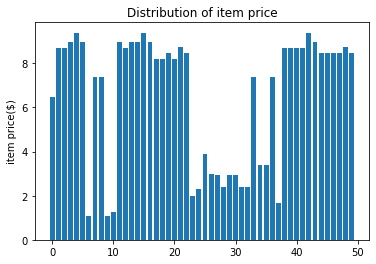

In [24]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

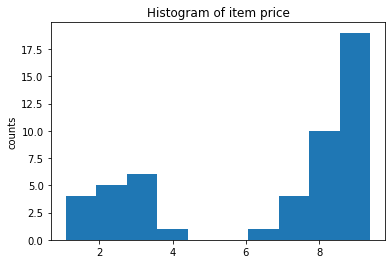

In [25]:
# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

-----

### [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]

In [26]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지를 계산합니다.
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


-----

### [“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기]

In [27]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지를 계산합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) # 한 주문 내에서 중복 집계된 item_name을 제거합니다.

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


-----

### [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]
#### 공지사항
- `'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기` 문제의 출제 의도 오류가 있었습니다. 원래의 의도는 `'Chicken Bowl'을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴에 대한 총 주문 수량`에 대한 문제였습니다. 이슈를 제기해주신 장기식님께 감사드립니다.
- 따라서, 현재 문제의 의도대로 코드를 변경하였습니다. 기존의 출제 의도`“Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴에 대한 총 주문 수량`에 대한 코드는 아래에 추가해두었습니다.

In [30]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])

33


In [31]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64